In [91]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [92]:
# lee el archivo csv separado por comas
df = pd.read_csv('buss.csv', sep=',' )
df.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,01/01/2015,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,01/01/2015,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,01/01/2015,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


In [93]:
#número total de registros
print("Número total de registros: ", len(df))

Número total de registros:  23158


In [94]:
#número de rutas únicas
print("Número de rutas únicas: ", len(df['Route'].unique()))

Número de rutas únicas:  612


In [95]:
rutas_unicas = pd.DataFrame(df['Route'].unique(), columns=['Route'])
rutas_unicas.head()

,Route
0,1
1,4
2,5
3,6
4,8


# Se identifica el año que más accidentes tubo

In [100]:
anio_mayor_accidentes = df['Year'].value_counts().idxmax()
anio_mayor_accidentes

2017

# Se realiza una grafica con el numero total de accidentes por año

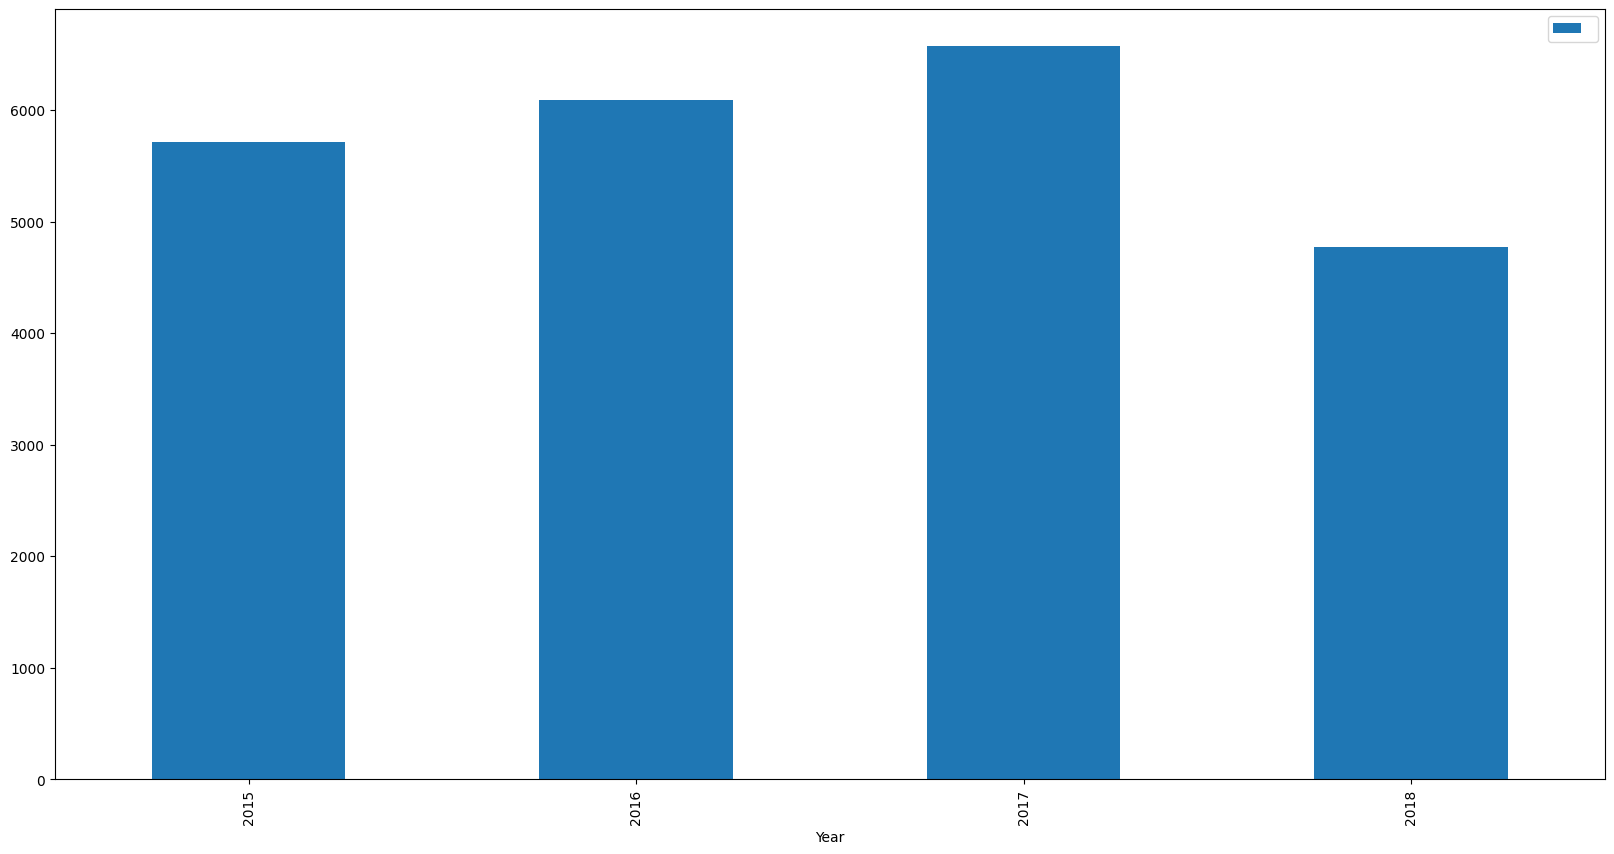

In [101]:
#accidentes por año
df.groupby(['Year']).size().plot(kind='bar',stacked=True,legend=True,figsize=(20,10))
plt.show()

# Se crea una grafica con el tipo de accidente y el año con mayor accidentes

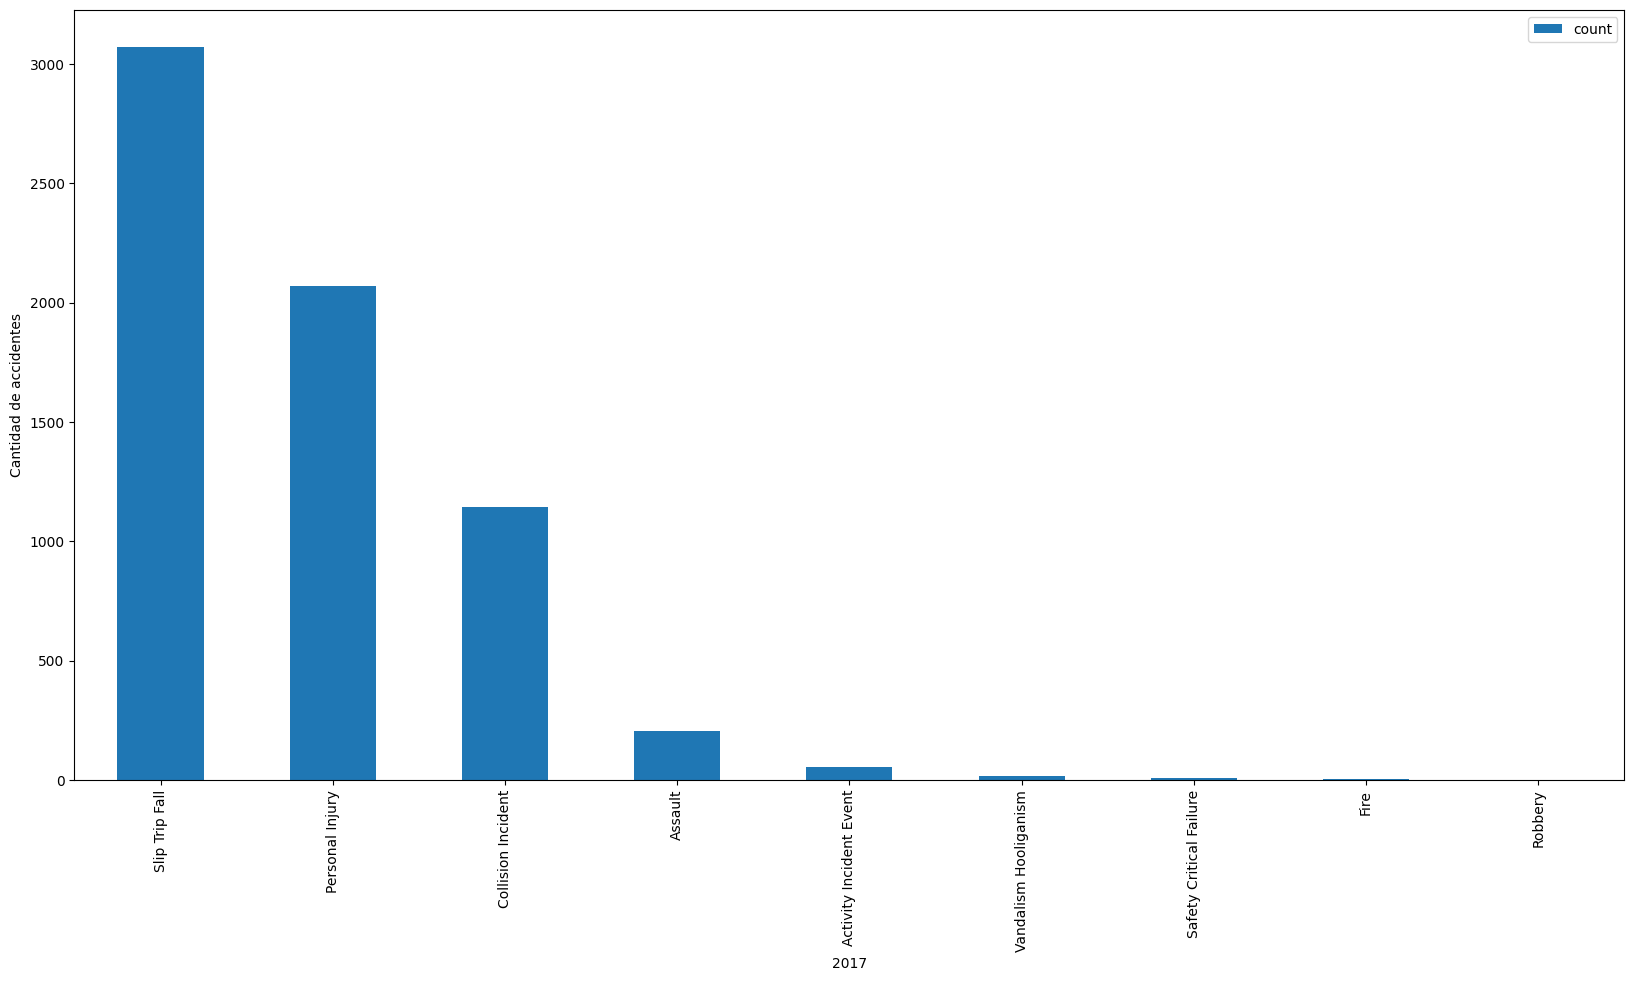

In [102]:
#Año con mayor accidentes y tipo de accidente
df[df['Year'] == anio_mayor_accidentes]['Incident Event Type'].value_counts().idxmax()
#plot
df[df['Year'] == anio_mayor_accidentes]['Incident Event Type'].value_counts().plot(kind='bar',stacked=True,legend=True,figsize=(20,10))
plt.ylabel('Cantidad de accidentes')
plt.xlabel('2017')
plt.show()

# Se identifica que el mes con mayor numero de accidentes y que tipo de accidentes fueron

In [103]:
#split de la columna de fecha, dia, mes y año

fechas = df['Date Of Incident']
#cambiar el formato de la fecha a dia, mes y año
fechas = pd.to_datetime(fechas, format='%d/%m/%Y')
fecha_nw = fechas.dt.strftime('%d/%m/%Y')
fecha_nw[2345:2350]

2345    01/03/2015
2346    01/03/2015
2347    01/03/2015
2348    01/03/2015
2349    01/03/2015
Name: Date Of Incident, dtype: object

In [104]:
mes = fechas.dt.month   
año = fechas.dt.year
dia = fechas.dt.day

#agregar las columnas de mes, año y dia al dataframe
df['Mes'] = mes
df['Dia'] = dia
df


,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age,Mes,Dia
0,2015,01/01/2015,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child,1,1
1,2015,01/01/2015,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown,1,1
2,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1,1
3,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1,1
4,2015,01/01/2015,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23153,2018,01/09/2018,(blank),East London,Stagecoach,West Ham,Newham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult,9,1
23154,2018,01/09/2018,(blank),London United,London United,Hounslow,Not specified,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult,9,1
23155,2018,01/09/2018,(blank),London United,London United,Park Royal,Harrow,Injuries treated on scene,Slip Trip Fall,Operational Staff,Male,Adult,9,1
23156,2018,01/09/2018,(blank),London United,London United,Shepherds Bush,Hammersmith & Fulham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult,9,1


In [105]:
#se crea un nuevo dataframe con las columnas que se van a utilizar
df1 = pd.DataFrame({'Día':dia,'Mes':mes,'Año':año})
df1[18266:18270]


,Día,Mes,Año
18266,1,12,2017
18267,1,12,2017
18268,1,12,2017
18269,1,12,2017


In [106]:
#imprime los meses solo del año 2017
df2 = df1[df1['Año'] == 2017]['Mes'].value_counts()
df2 = pd.DataFrame({'Mes':df2.index, 'Cantidad':df2.values, 'Año':2017})
df2

,Mes,Cantidad,Año
0,7,650,2017
1,10,621,2017
2,11,584,2017
3,3,579,2017
4,4,563,2017
5,8,563,2017
6,9,549,2017
7,6,516,2017
8,12,516,2017
9,5,510,2017


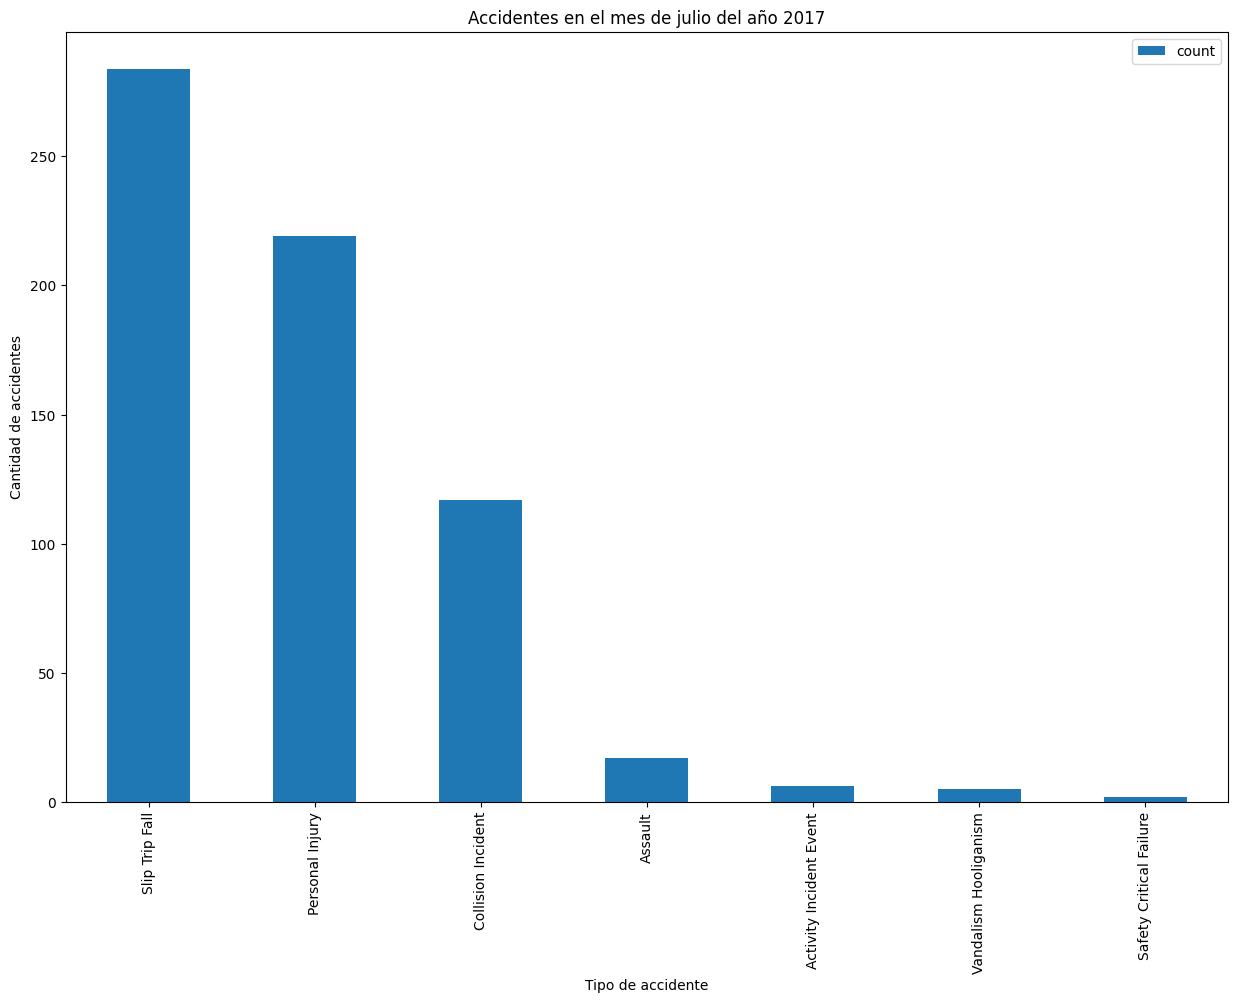

In [129]:
#si el año es igual a 2017 y el mes es igual a 7, imprime el tipo de accidente y la cantidad de accidentes
df[(df['Year'] == 2017) & (df['Mes'] == 7)]['Incident Event Type'].value_counts().plot(kind='bar',stacked=True,legend=True,figsize=(15,10))
plt.title('Accidentes en el mes de julio del año 2017')
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Tipo de accidente')
plt.show()

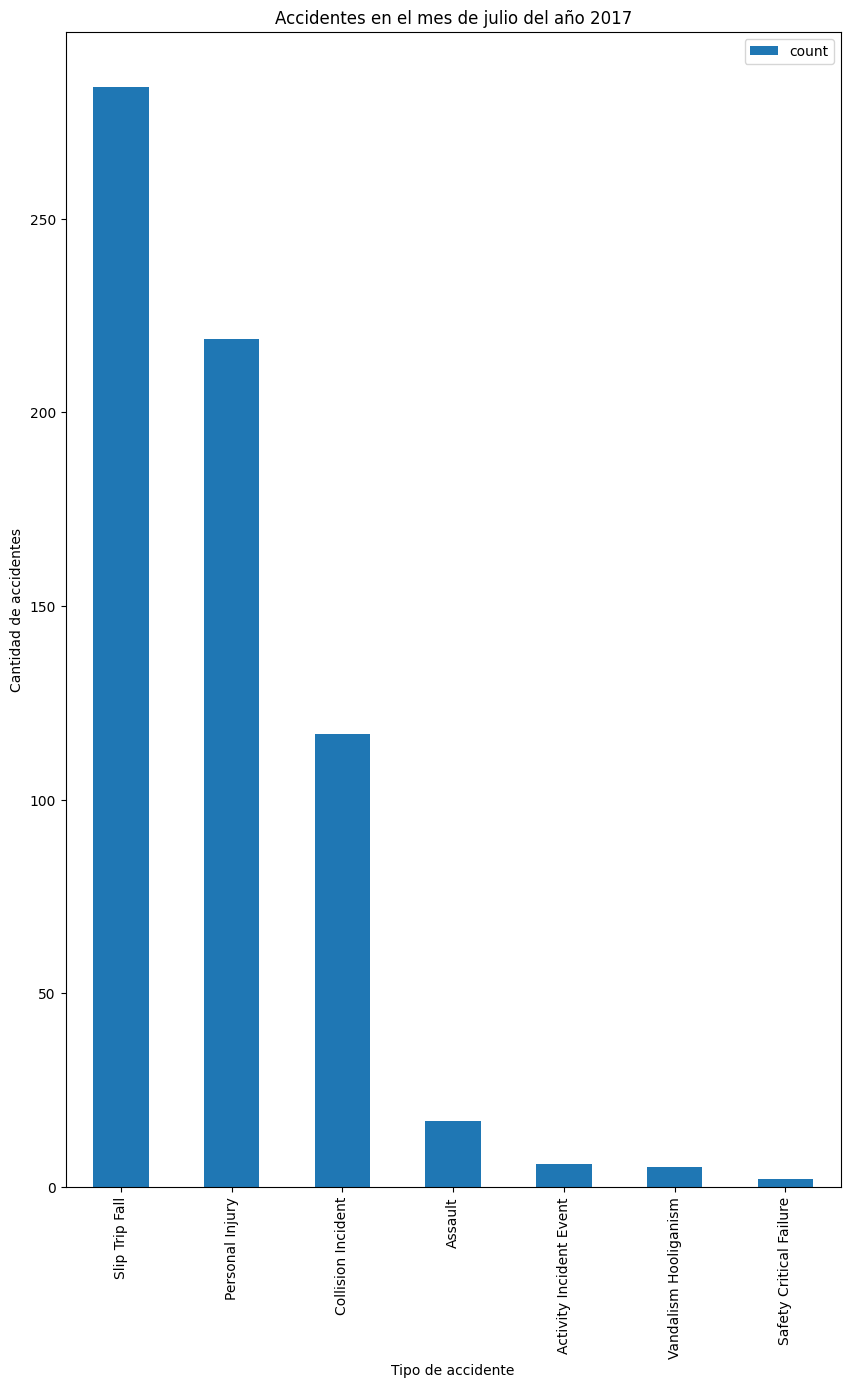

In [112]:
#si el año es igual a 2017 y el mes es igual a 7, imprime el tipo de accidente y la cantidad de accidentes con porcentaje
df[(df['Year'] == 2017) & (df['Mes'] == 7)]['Incident Event Type'].value_counts().plot(kind='bar',stacked=True,legend=True,figsize=(10,15))
plt.title('Accidentes en el mes de julio del año 2017')
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Tipo de accidente')
plt.show()

# Número total de operadores


In [131]:
num_operadores = len(df['Operator'].unique())
print("Número de operadores únicos: ", num_operadores)
operadores = pd.DataFrame(df['Operator'].unique(), columns=['Operator'])
operadores[0:10]

Número de operadores únicos:  25


,Operator
0,London General
1,Metroline
2,East London
3,Selkent
4,London United
5,London Central
6,Metroline West
7,Tower Transit
8,Arriva London North
9,Abellio London


In [136]:
#número de veces que aparece cada operador como operador de una ruta data frame
num_operadores_rutas = df.groupby('Operator')['Route'].count()
num_operadores_rutas = pd.DataFrame(num_operadores_rutas)
num_operadores_rutas = num_operadores_rutas.rename(columns={'Route':'Num_Routes'})

cantidad_operadores_rutas = pd.merge(operadores, num_operadores_rutas, on='Operator')
cantidad_operadores_rutas = cantidad_operadores_rutas.sort_values(by=['Num_Routes'], ascending=False)
cantidad_operadores_rutas

,Operator,Num_Routes
1,Metroline,3457
8,Arriva London North,3208
2,East London,2402
4,London United,2263
3,Selkent,1808
11,Arriva London South,1743
0,London General,1723
5,London Central,1367
6,Metroline West,1232
9,Abellio London,963


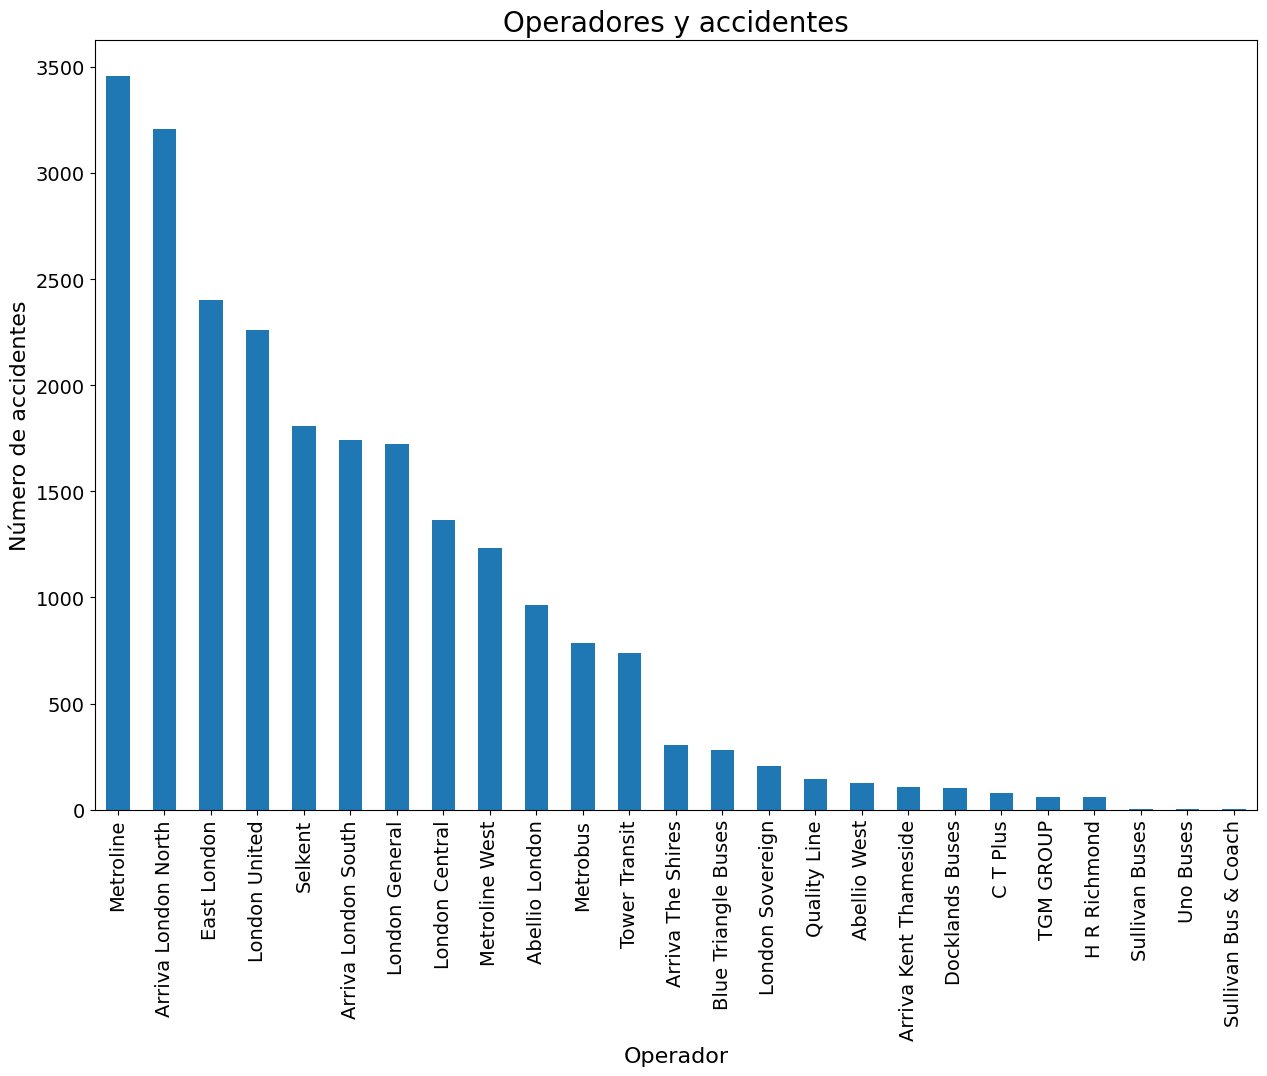

In [140]:
#grafica todos los operadores y sus accidentes
numero_veces_operador.plot(kind='bar', figsize=(15,10), fontsize=14)
plt.title('Operadores y accidentes', fontsize=20)
plt.xlabel('Operador', fontsize=16)
plt.ylabel('Número de accidentes', fontsize=16)
plt.show()


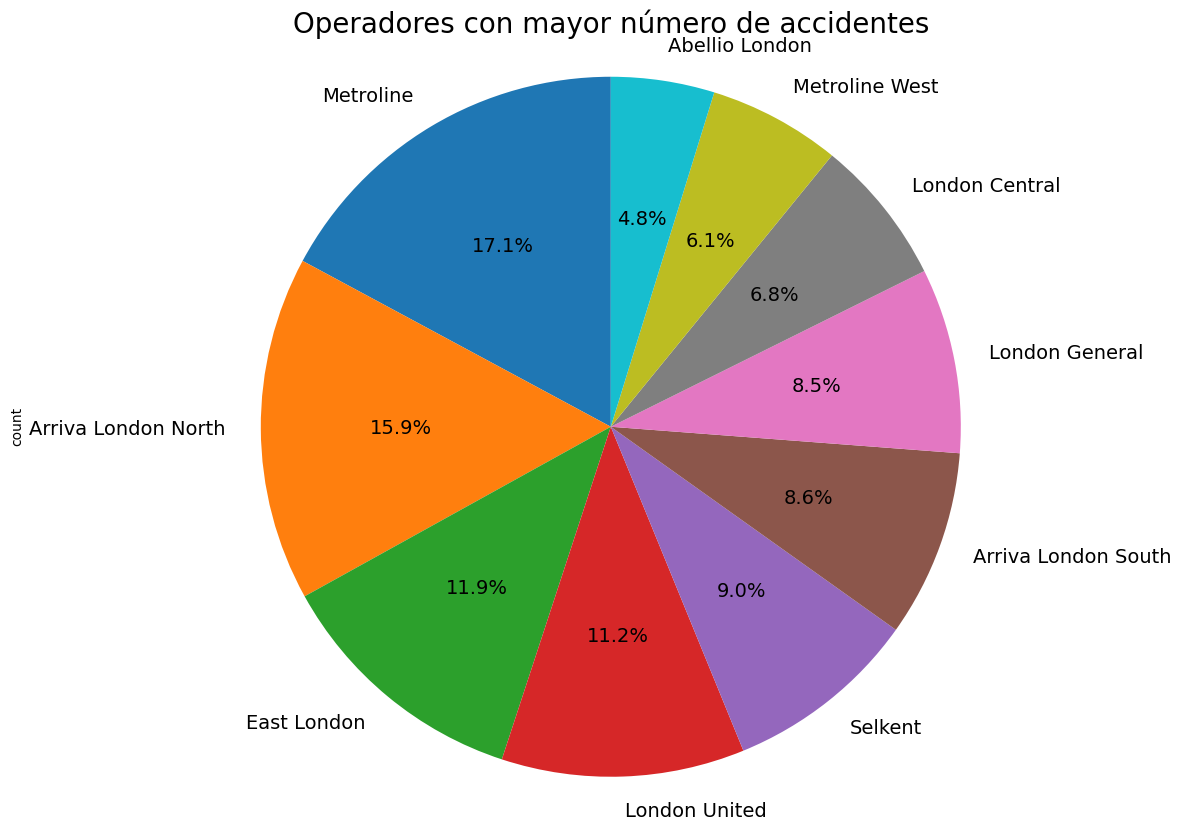

In [137]:
numero_veces_operador = df['Operator'].value_counts()
#print(numero_veces_operador)
#grafica de pie con los operadores y el mayor numero de acidentes
numero_veces_operador[0:10].plot(kind='pie', y='Operator', figsize=(15,10), autopct='%1.1f%%', startangle=90, shadow=False, labels=numero_veces_operador.index, legend = False, fontsize=14)
plt.title('Operadores con mayor número de accidentes', fontsize=20)
plt.axis('equal')
plt.show()

# Accidentes del operador con mayor numero de incidentes

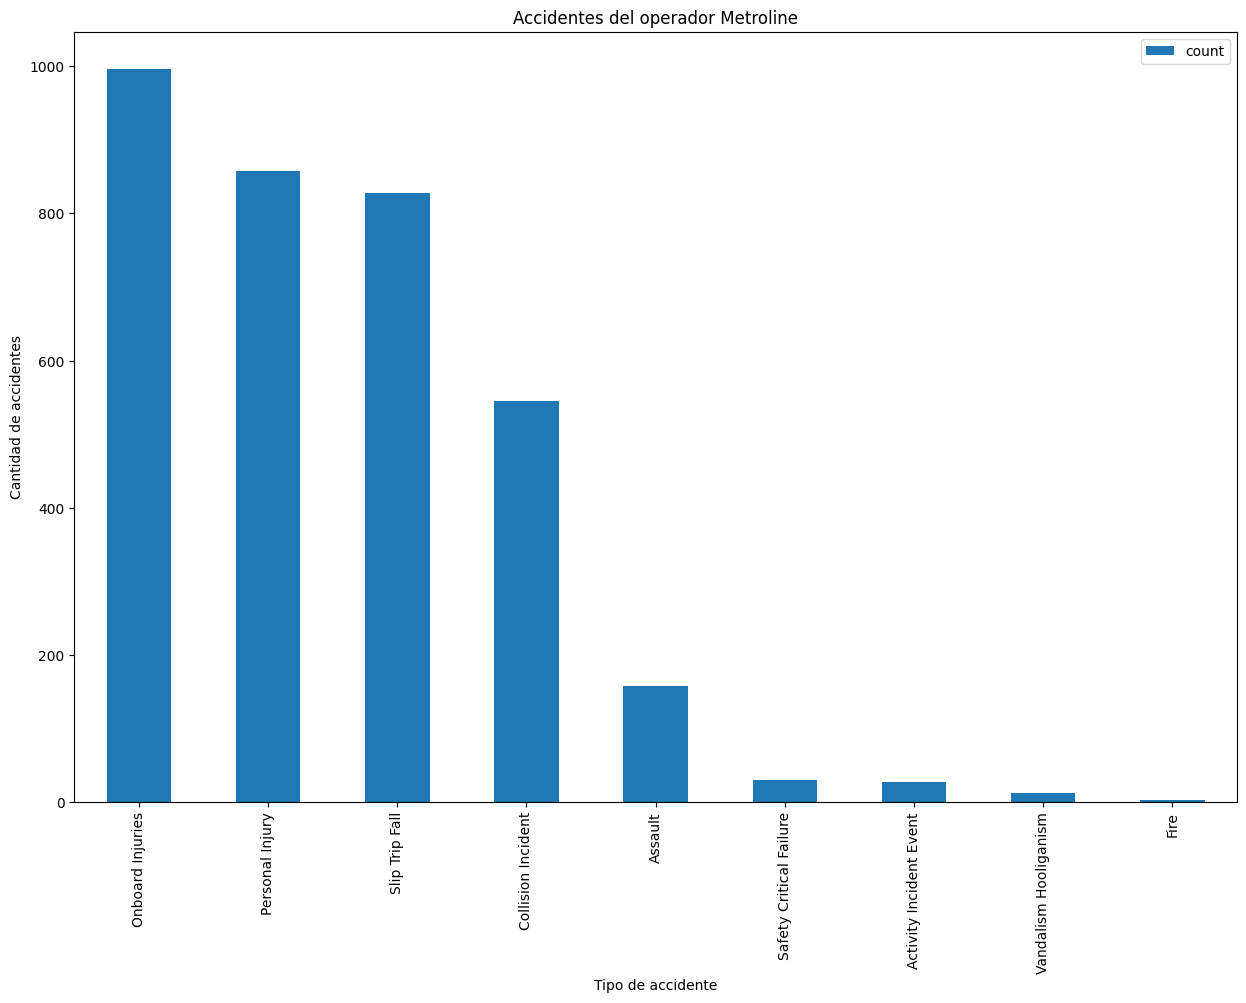

In [127]:
#tipos de accidentes por operador, donde el operador haya aparecido más veces, grafica de colores 

df[df['Operator'] == 'Metroline']['Incident Event Type'].value_counts().plot(kind='bar',stacked=True,legend=True,figsize=(15,10))
plt.title('Accidentes del operador Metroline')
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Tipo de accidente')
plt.show()
